In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob
from scipy import stats


In [10]:
data_folder = 'hubmap-data/Healthy-data/'
data_folder_disease = 'hubmap-data/hubmap-data/Disease_Data/'
labels_matrix = pd.read_csv('hubmap-data/hubmap-data/Disease_Data/labels_fixed.csv')
feature_matrices = glob(data_folder+'*.xlsx')
feature_matrices_disease = glob(data_folder_disease + '*.xlsx')

In [36]:
def clean_data(matrix):
    features = pd.read_excel(matrix,sheet_name='tubules')
    features = np.array(features['Luminal Fraction'])
    return features

def clean_data_disease(matrix,labels_matrix):
    boool = labels_matrix['Slide_Name'].str.contains(matrix.split('/')[-1].split('_tubules_Features.xlsx')[0])
    lab = labels_matrix['Label'][boool]
    try:
        lab = np.array(lab)[0]
    except:
        lab = 0

    
    features = pd.read_excel(matrix,sheet_name='Morphological Features')
    features = np.array(features['Luminal Space Area By Object Area'])
    label_disease = lab*np.ones_like(features)

    return features,label_disease

In [6]:
features_clean = []
for i in feature_matrices:
    features_clean.append(clean_data(i))

ValueError: Worksheet named 'Morphological Features' not found

In [47]:
labels_disease_list = []
features_clean_disease = []
for i in feature_matrices_disease:
    features_disease,labels_disease = clean_data_disease(i,labels_matrix)
    features_clean_disease.append(features_disease)
    labels_disease_list.append(labels_disease)

In [48]:
def df_create(lists):
    for idx,l in enumerate(lists):
        lists[idx] = np.expand_dims(np.squeeze(l),-1)
    full_mat = np.concatenate(lists,0)
    label = np.zeros_like(full_mat)
    full = np.concatenate((full_mat,label),axis=-1)
    full_df = pd.DataFrame(full)
    return full_df

def labels_create(lists):
    for idx,l in enumerate(lists):
        lists[idx] = np.expand_dims(np.squeeze(l),-1)
    full_mat = np.concatenate(lists,0)
    return full_mat
    


In [50]:
full_df = df_create(features_clean)
full_df.columns=['Lumen','label']


full_labels_disease = labels_create(labels_disease_list)
full_df_disease = df_create(features_clean_disease)
full_df_disease.columns = ['Lumen','label']
full_df_disease['label'] = np.array(full_labels_disease)
full_df_disease = full_df_disease[full_df_disease['label'] != 0]
    

In [54]:
full_dataset = pd.concat((full_df,full_df_disease))

           Lumen  label
0       0.128162    0.0
1       0.404060    0.0
2       0.473063    0.0
3       0.355932    0.0
4       0.441941    0.0
...          ...    ...
345786  0.467826    2.0
345787  0.803466    2.0
345788  0.553671    2.0
345789  0.579518    2.0
345790  0.587583    2.0

[1763067 rows x 2 columns]


Healthy vs AKI
t=-101.11485600310964
p=0.0
Healthy vs CKD
t=-335.2453634643242
p=0.0
AKI vs CKD
t=-46.45069537838903
p=0.0


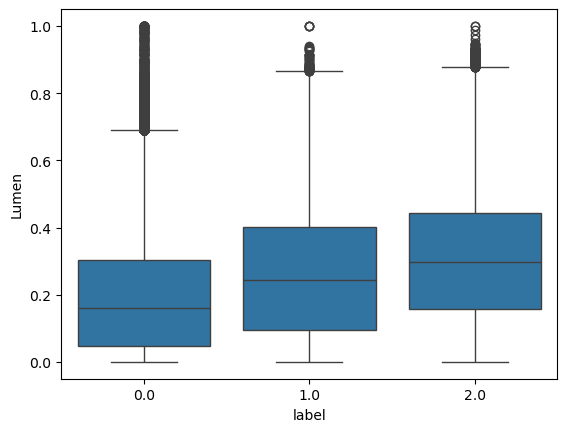

In [64]:
sns.boxplot(x='label', y='Lumen', data=full_dataset)
group_a = full_dataset[full_dataset['label'] == 0]['Lumen']
group_b = full_dataset[full_dataset['label'] == 1]['Lumen']
t_statistic, p_value = stats.ttest_ind(group_a, group_b)
print('Healthy vs AKI')
print(f't={t_statistic}')
print(f'p={p_value}')

group_a = full_dataset[full_dataset['label'] == 0]['Lumen']
group_b = full_dataset[full_dataset['label'] == 2]['Lumen']
t_statistic, p_value = stats.ttest_ind(group_a, group_b)
print('Healthy vs CKD')
print(f't={t_statistic}')
print(f'p={p_value}')

group_a = full_dataset[full_dataset['label'] == 1]['Lumen']
group_b = full_dataset[full_dataset['label'] == 2]['Lumen']
t_statistic, p_value = stats.ttest_ind(group_a, group_b)
print('AKI vs CKD')
print(f't={t_statistic}')
print(f'p={p_value}')
plt.show()